In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.


In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
from matplotlib import pyplot as plt

In [16]:
customer = pd.read_csv("C:/Users/dharmendra.sing1/Customer.csv")

In [18]:
prod_cat = pd.read_csv("C:/Users/dharmendra.sing1/prod_cat_info.csv")

In [19]:
transactions = pd.read_csv("C:/Users/dharmendra.sing1/Transactions.csv")

# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.


In [20]:
Customer_Final= pd.merge(transactions,prod_cat,
             left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'],
             how='left').merge(customer,left_on='cust_id',right_on='customer_Id',how='inner' )

# 2.a. Get the column names and their corresponding data types


In [21]:
print(Customer_Final.dtypes)

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
dtype: object


 2.b. Top/Bottom 10 observations

In [22]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,270351,26-09-1981,M,5.0
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,Clothing,1,Women,270351,26-09-1981,M,5.0
2,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,Footwear,3,Women,270351,26-09-1981,M,5.0
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,Electronics,8,Personal Appliances,270351,26-09-1981,M,5.0
4,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,Books,6,DIY,270351,26-09-1981,M,5.0
5,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,270384,11-05-1973,F,8.0
6,29258453508,270384,20-02-2014,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,5,Computers,270384,11-05-1973,F,8.0
7,92734514344,270384,26-10-2013,1,4,2,1362,286.020,3010.020,TeleShop,Bags,1,Mens,270384,11-05-1973,F,8.0
8,865952996,270384,6/8/2013,12,6,2,86,18.060,190.060,MBR,Home and kitchen,12,Tools,270384,11-05-1973,F,8.0
9,4116651679,270384,6/8/2013,6,5,1,1343,141.015,1484.015,TeleShop,Books,6,DIY,270384,11-05-1973,F,8.0


In [23]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
23043,11090753771,270827,8/2/2011,1,1,3,74,23.310,245.310,e-Shop,Clothing,1,Women,270827,04-03-1970,F,10.0
23044,85951181720,267166,8/2/2011,5,3,3,1137,358.155,3769.155,MBR,Electronics,5,Computers,267166,22-02-1970,F,4.0
23045,79685748610,272539,5/2/2011,7,5,2,94,19.740,207.740,TeleShop,Books,7,Fiction,272539,23-05-1977,F,7.0
23046,23353379671,273036,4/2/2011,10,3,3,209,65.835,692.835,e-Shop,Electronics,10,Audio and video,273036,09-11-1971,F,2.0
23047,12933894691,272706,31-01-2011,1,4,5,361,189.525,1994.525,MBR,Bags,1,Mens,272706,09-03-1974,M,8.0
23048,16293185603,274931,31-01-2011,8,3,3,137,43.155,454.155,Flagship store,Electronics,8,Personal Appliances,274931,10-06-1972,M,10.0
23049,70163958026,267902,30-01-2011,10,5,4,404,169.680,1785.680,e-Shop,Books,10,Non-Fiction,267902,17-07-1975,M,4.0
23050,20417144530,269556,29-01-2011,10,6,3,654,206.010,2168.010,Flagship store,Home and kitchen,10,Kitchen,269556,27-12-1972,M,5.0
23051,58531412371,274935,29-01-2011,10,5,4,104,43.680,459.680,Flagship store,Books,10,Non-Fiction,274935,09-09-1977,F,3.0
23052,83245680995,273723,26-01-2011,4,4,4,1477,620.340,6528.340,e-Shop,Bags,4,Women,273723,21-01-1984,F,4.0


# 2. c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [24]:
Customer_Final['Rate'].describe()

count    23053.000000
mean       636.369713
std        622.363498
min      -1499.000000
25%        312.000000
50%        710.000000
75%       1109.000000
max       1500.000000
Name: Rate, dtype: float64

In [25]:
Customer_Final['Qty'].describe()

count    23053.000000
mean         2.432395
std          2.268406
min         -5.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Qty, dtype: float64

In [26]:
Customer_Final['total_amt'].describe()

count    23053.000000
mean      2107.308002
std       2507.561264
min      -8270.925000
25%        762.450000
50%       1754.740000
75%       3569.150000
max       8287.500000
Name: total_amt, dtype: float64

d. Frequency tables for all the categorical variables.

In [27]:
pd.crosstab(index=Customer_Final["Store_type"],columns="count")

col_0,count
Store_type,
Flagship store,4577
MBR,4661
TeleShop,4504
e-Shop,9311


In [28]:
pd.crosstab(index=Customer_Final["prod_cat"],columns="count")

col_0,count
prod_cat,
Bags,1998
Books,6069
Clothing,2960
Electronics,4898
Footwear,2999
Home and kitchen,4129


In [29]:
pd.crosstab(index=Customer_Final["prod_subcat"],columns="count")

col_0,count
prod_subcat,
Academic,967
Audio and video,952
Bath,1023
Cameras,985
Children,1035
Comics,1031
Computers,958
DIY,989
Fiction,1043


# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.


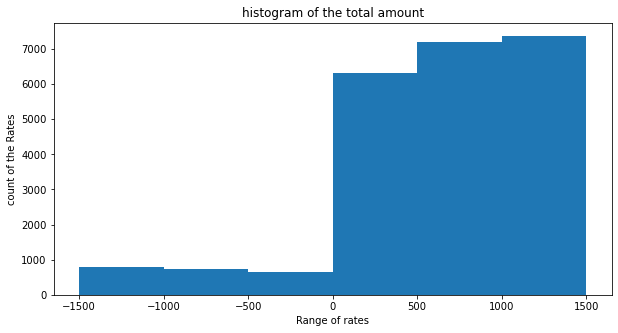

In [36]:
fig, axis = plt.subplots(figsize =(10, 5))
axis.hist(Customer_Final['Rate'], bins = [-1500,-1000,-500,0,500,1000,1500])
plt.xlabel("Range of rates")
plt.ylabel("count of the Rates")
plt.title("histogram of the total amount")
plt.show()

<AxesSubplot:ylabel='Frequency'>

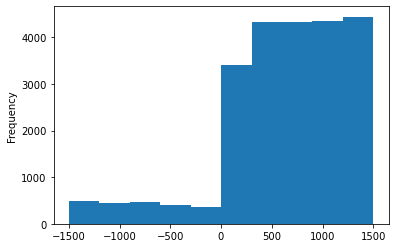

In [32]:
Customer_Final.Rate.plot(kind = 'hist')

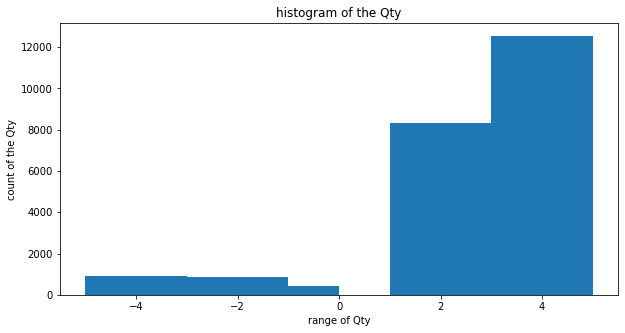

In [22]:
fig, axis = plt.subplots(figsize =(10, 5))
axis.hist(Customer_Final['Qty'], bins = [-5,-3,-1,0,1,3,5])
plt.xlabel("range of Qty")
plt.ylabel("count of the Qty")
plt.title("histogram of the Qty")
plt.show()

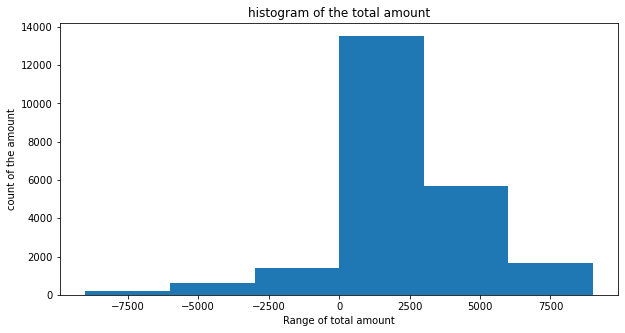

In [23]:
fig, axis = plt.subplots(figsize =(10, 5))
axis.hist(Customer_Final['total_amt'], bins = [-9000,-6000,-3000,0,3000,6000,9000])
plt.xlabel("Range of total amount")
plt.ylabel("count of the amount")
plt.title("histogram of the total amount")
plt.show()

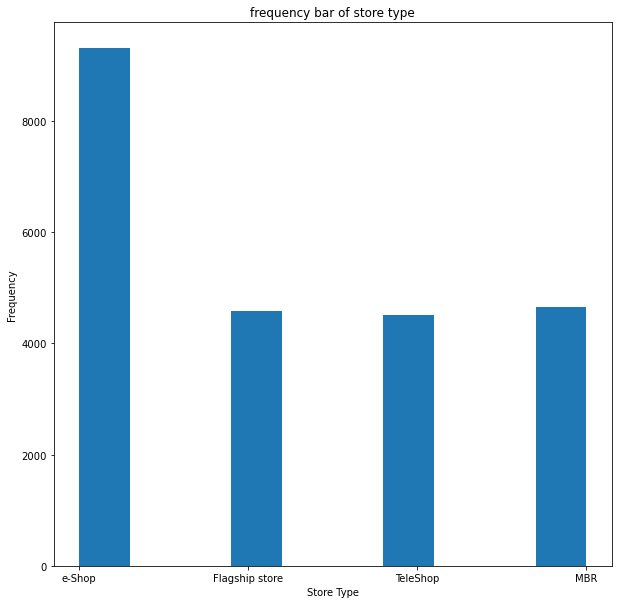

In [24]:
fig, axis = plt.subplots(figsize =(10, 10))
plt.hist(Customer_Final["Store_type"])
plt.title("frequency bar of store type")
plt.xlabel("Store Type")
plt.ylabel("Frequency")

plt.show()

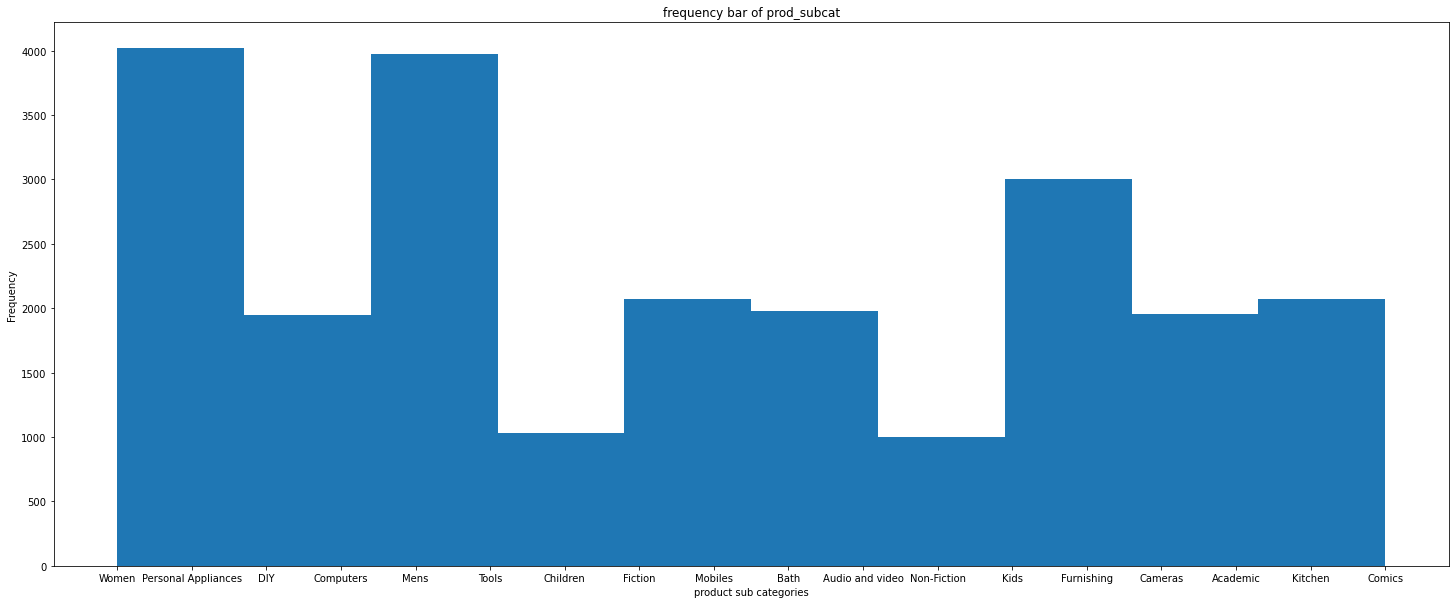

In [25]:
fig,axis=plt.subplots(figsize=(25,10))
plt.hist(Customer_Final["prod_subcat"])
plt.title("frequency bar of prod_subcat")
plt.xlabel("product sub categories")
plt.ylabel("Frequency")
plt.show()

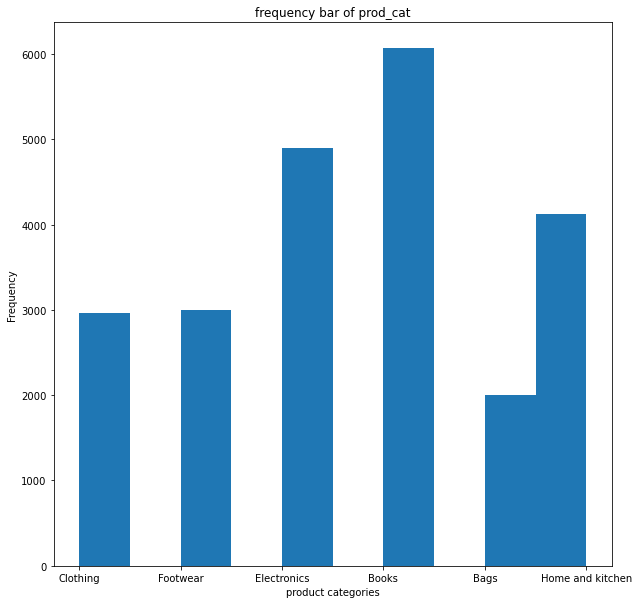

In [26]:
fig,axis=plt.subplots(figsize=(10,10))
plt.hist(Customer_Final["prod_cat"])
plt.title("frequency bar of prod_cat")
plt.xlabel("product categories")
plt.ylabel("Frequency")
plt.show()

# 4. Calculate the following information using the merged dataset :
# a. Time period of the available transaction data

In [27]:
Customer_Final["tran_date"].min(),Customer_Final["tran_date"].max()

('1/1/2012', '9/9/2013')

# b. Count of transactions where the total amount of transaction was negative


In [28]:
count=0
for i in range(len(Customer_Final["total_amt"])): 
    if  Customer_Final["total_amt"][i] < 0: 
        count=count+1
print(count)

2177


In [29]:

Customer_Final['flag']=np.where(Customer_Final.total_amt < 0, "Negative" , "Positive")
Customer_Final.flag.value_counts()

Positive    20876
Negative     2177
Name: flag, dtype: int64

# 5. Analyze which product categories are more popular among females vs male customers.


In [62]:
women_men=Customer_Final[((Customer_Final.prod_subcat == "Women") |  (Customer_Final.prod_subcat =="Mens"))]
women_men.pivot_table(index='prod_subcat',columns='prod_cat',values = 'total_amt',aggfunc='count')


prod_cat,Bags,Clothing,Footwear
prod_subcat,,,
Mens,1003,967,942
Women,995,1005,1048


# 6. Which City code has the maximum customers and what was the percentage of customers from that city?


In [98]:
table =Customer_Final.pivot_table(index='city_code',values='total_amt',aggfunc=('count')).reset_index()
table['%age']=table.total_amt/table.total_amt.sum()*100
print( table.sort_values(by=['%age'],ascending=False))

   city_code  total_amt       %age
3        4.0       2422  10.509872
2        3.0       2411  10.462139
4        5.0       2360  10.240833
6        7.0       2356  10.223476
9       10.0       2333  10.123671
7        8.0       2330  10.110653
1        2.0       2270   9.850293
0        1.0       2258   9.798221
8        9.0       2178   9.451074
5        6.0       2127   9.229768


# 7. Which store type sells the maximum products by value and by quantity?


In [130]:
#method:1
Customer_Final.pivot_table(index='Store_type',values='total_amt',aggfunc=(['count','sum'])).reset_index()


,Store_type,count,sum
,,total_amt,total_amt
0,Flagship store,4577,9.715688e+06
1,MBR,4661,9.674486e+06
2,TeleShop,4504,9.364781e+06
3,e-Shop,9311,1.982482e+07


In [143]:
#method:2
table1 = Customer_Final.pivot_table(index='Store_type',values='total_amt',aggfunc=('sum')).reset_index()
table2 = Customer_Final.pivot_table(index='Store_type',values='total_amt',aggfunc=('count')).reset_index()
Final_table=pd.merge(table1,table2,left_on='Store_type',right_on='Store_type')
Final_table.rename(columns = {'total_amt_x':'Total_Value','total_amt_y':'Total_Quantity'},inplace = True)
print( Final_table.sort_values(by=['Total_Quantity'],ascending=False))


       Store_type   Total_Value  Total_Quantity
3          e-Shop  1.982482e+07            9311
1             MBR  9.674486e+06            4661
0  Flagship store  9.715688e+06            4577
2        TeleShop  9.364781e+06            4504


# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [170]:
Flagship_Stores=Customer_Final[((Customer_Final.Store_type == "Flagship store") & (Customer_Final.prod_cat=="Electronics") | (Customer_Final.prod_cat=="Clothing"))]
Flagship_Stores1=Flagship_Stores.pivot_table(index='prod_cat',values='total_amt',aggfunc=('sum')).reset_index()
print("total amount earned from the Electronics and Clothing categories from Flagship Stores")
print(Flagship_Stores1)

total amount earned from the Electronics and Clothing categories from Flagship Stores
      prod_cat   total_amt
0     Clothing  6251137.49
1  Electronics  2215136.04


# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [183]:
mens_ele=Customer_Final[((Customer_Final.Gender == "M") & (Customer_Final.prod_cat=="Electronics"))]
mens_ele1=mens_ele.pivot_table(index='prod_cat',values='total_amt',aggfunc=('sum')).reset_index()
print("total amount earned from Male customers under the Electronics category:- ")
print(mens_ele1)

total amount earned from Male customers under the Electronics category:- 
      prod_cat    total_amt
0  Electronics  5703109.425


In [188]:
unique=Customer_Final.drop_duplicates(subset ="transaction_id")
mens_ele=Customer_Final[((Customer_Final.Gender == "M")

# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [209]:
#method:- 1
unique=Customer_Final.drop_duplicates(subset ="transaction_id")
unique.flag.value_counts()

Positive    18819
Negative     2059
Name: flag, dtype: int64

In [192]:
#method:- 2
unique=Customer_Final.drop_duplicates(subset ="transaction_id")
unique1=unique[unique.flag == "Negative"]
unique1.flag.value_counts()

Negative    2059
Name: flag, dtype: int64

In [200]:
#method:- 3
unique=Customer_Final.drop_duplicates(subset ="transaction_id")
unique1=unique[unique.flag == "Negative"]
unique2 = unique1.pivot_table(index='flag',values='total_amt',aggfunc=('count')).reset_index()
unique2.rename(columns = {'flag':'negative type'},inplace = True)
print(unique2)

  negative type  total_amt
0      Negative       2059


# 11. For all customers aged between 25 - 35, find out:


In [251]:
#age_Calculation and new column age geberaton :- 
Customer_Final["age"]=pd.Timestamp.now().year-pd.to_datetime(Customer_Final['DOB']).dt.year

# a. What was the total amount spent for “Electronics” and “Books” product categories?

In [282]:
book_ele=Customer_Final[((Customer_Final.age>25)&(Customer_Final.age<35) & (Customer_Final.prod_cat=="Electronics") | (Customer_Final.prod_cat=="Books"))]
book_ele.pivot_table(index="prod_cat",values="total_amt",aggfunc="sum").reset_index()

,prod_cat,total_amt
0,Books,12822694.04
1,Electronics,2272147.41


# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [367]:
#date conversion
d1 = '01-01-2014'
d2 = '01-03-2014'
start_date = pd.to_datetime(d3, format = '%d-%m-%Y')
end_date = pd.to_datetime(d4, format = '%d-%m-%Y')


In [368]:
book_ele=Customer_Final[((Customer_Final.age>25)&(Customer_Final.age<35) & (pd.to_datetime(Customer_Final.tran_date)>start_date)& (pd.to_datetime(Customer_Final.tran_date)>end_date))]
book_ele.pivot_table(index="age",values="total_amt",aggfunc="sum").reset_index()

,age,total_amt
0,30,25077.975
1,31,61787.180
2,32,20733.115
3,33,23038.145
4,34,38139.075
